<a href="https://colab.research.google.com/github/dhdmsdud/TIL/blob/master/CNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models     import Sequential, Model
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout ,Flatten, Conv2D, MaxPooling2D , AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Input
from tensorflow.keras.optimizers import SGD , Adam , RMSprop
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns


# dataset
from tensorflow.keras.datasets   import cifar10 , mnist

# from tensorflow.keras.datasets.mnist import load_data
# from tensorflow.keras.datasets.fashion_mnist import load_data
# from sklearn.datasets            import load_breast_cancer

from sklearn.datasets            import load_digits


### CNN(Convolutional Neural Networks) : 합성곱 신경망
- 픽셀로 이루어진 이미지(R,G,B) --> 3개의 채널로 만들어진 3차원
- 0으로 가까워지면 흰색, 255로 가까워지면 검은색

### CIFAR10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train[0]

array([6], dtype=uint8)

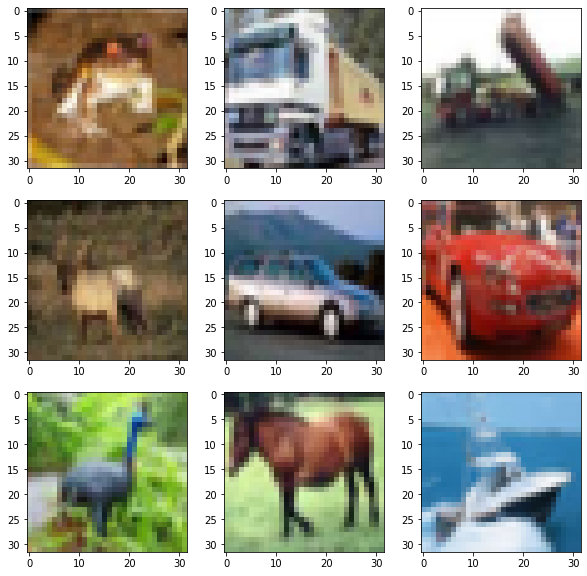

In [6]:
fig = plt.figure(figsize=(10, 10))
for i in range(9) :
    fig.add_subplot(3, 3, i+1)
    plt.imshow(X_train[i])

### MNIST

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

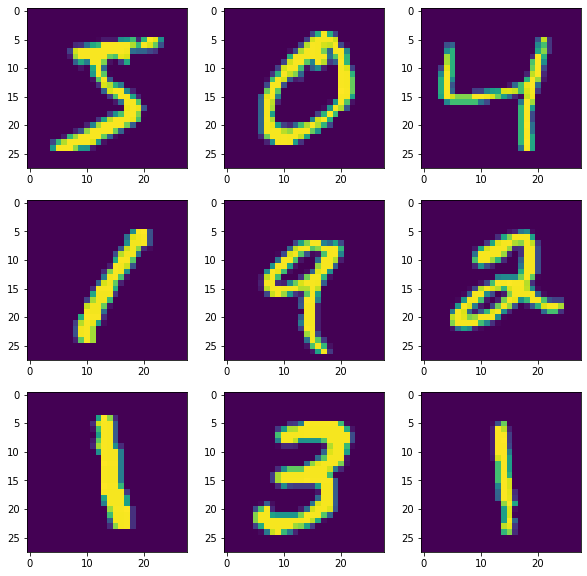

In [9]:
fig = plt.figure(figsize=(10, 10))
for i in range(9) :
    fig.add_subplot(3, 3, i+1)
    plt.imshow(X_train[i])

In [10]:
# Conv2D(input_shape, filters, kernel_size, strides, padding) --> input
# padding = 'valid' : 출력이미지 < 입력이미지(유효한 영역만 리턴)
# padding = 'same'  : 출력이미지 = 입력이미지

model = Sequential()

# 커널, 필터
model.add(Conv2D(input_shape=(10, 10, 3), filters=10, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
# model.add(Conv2D(input_shape=(10, 10, 3), filters=10, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
print(model.output_shape)

# 풀링
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='valid'))
print(model.output_shape)

# Flatten
model.add(Flatten())
print(model.output_shape)

# Fully connected
model.add(Dense(50))
print(model.output_shape)

(None, 8, 8, 10)
(None, 4, 4, 10)
(None, 160)
(None, 50)


In [11]:
# 커널, 필터를 함수형으로 바꿔보기
input_layer   = Input(shape=(10, 10, 3))
padding_layer = Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), padding='valid')(input_layer)

model = Model(inputs=input_layer, outputs=padding_layer)
model.output.shape

TensorShape([None, 8, 8, 10])

### Digit image (8 * 8)

In [42]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

label -->  0


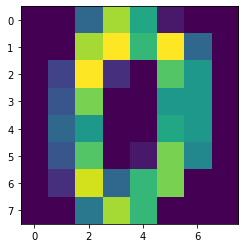

In [43]:
plt.imshow(data.images[0])
print('label --> ', data.target[0])

In [44]:
X_data = data.images
y_data = data.target

In [45]:
X_data.shape, y_data.shape

((1797, 8, 8), (1797,))

In [46]:
X_data.shape[0], X_data.shape[1], X_data.shape[2]

(1797, 8, 8)

In [47]:
# 차원이 안나오므로 reshape --> 흑백 : 1, 컬러 : 3
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1], X_data.shape[2], 1)
X_data.shape

(1797, 8, 8, 1)

In [48]:
 y_data = to_categorical(y_data)
 y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2, random_state=7)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [51]:
# 모델 만들기
model = Sequential()

In [52]:
# 합성곱 레이어 만들기
model.add(Conv2D(input_shape=(X_train.shape[1], X_data.shape[2], X_data.shape[3]), filters=10, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))

In [53]:
# 풀링 만들기
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

In [54]:
# Flatten
model.add(Flatten())

# Fully connected
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 6, 6, 10)          100       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
_________________________________________________________________


In [56]:
# compile
adam = Adam(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=100, verbose=0)

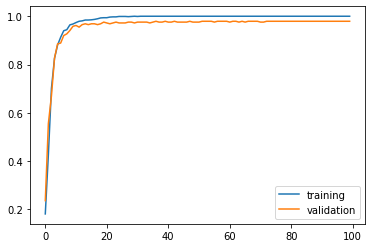

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [59]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : ', result[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9694
Test accuracy :  0.9694444537162781


### Deep CNN

In [35]:
def deep_cnn() :
    model = Sequential()

    model.add(Conv2D(input_shape=(X_train.shape[1], X_data.shape[2], X_data.shape[3]), filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    adam = Adam(lr = 0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [36]:
model = deep_cnn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 50)          500       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 50)          22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 50)          22550     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 50)         

In [37]:
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=100, verbose=0)

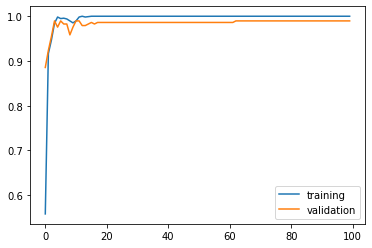

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [40]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : ', result[1])

12/12 [==============================] - 0s 7ms/step - loss: 0.0718 - accuracy: 0.9833
Test accuracy :  0.9833333492279053


In [60]:
def improve_deep_cnn() :
    model = Sequential()

    model.add(Conv2D(input_shape=(X_train.shape[1], X_data.shape[2], X_data.shape[3]), filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

    adam = Adam(lr = 0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [62]:
model = improve_deep_cnn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 8, 8, 50)          500       
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 50)          200       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 50)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 50)          22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 50)          200       
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 50)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 50)         

In [63]:
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=100, verbose=0)

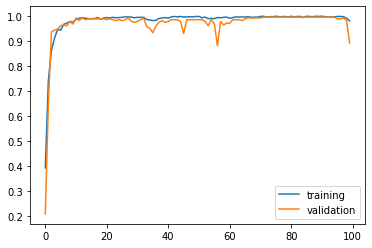

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [65]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : ', result[1])

12/12 [==============================] - 0s 8ms/step - loss: 1.2762 - accuracy: 0.8306
Test accuracy :  0.8305555582046509


### keras MNIST

In [76]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [77]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [78]:
# 차원이 안나오므로 reshape --> 흑백 : 1, 컬러 : 3
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))